In [1]:
import numpy as np
import scipy
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt

1) A little introductory brain teaser. Which is more probable when rolling 2 six-sided dice: rolling snake eyes (two ones) or rolling sevens (dice sum to seven)? What is the ratio of the probabilities?

Probability of snake eyes: $ \frac{1}{6} * \frac{1}{6} = \frac{1}{36}$

Probability of dice summing to 7: P(1)*P(6) + P(6)*P(1) + P(3)*P(4) + P(4)*P(3) + P(2)*P(5) + P(5)*P(2) = $ (\frac{1}{6} * \frac{1}{6}) + (\frac{1}{6} * \frac{1}{6}) + (\frac{1}{6} * \frac{1}{6}) + (\frac{1}{6} * (\frac{1}{6}) + (\frac{1}{6} * \frac{1}{6}) + (\frac{1}{6} * \frac{1}{6}) =  \frac{6}{36} $

2) Following what we did in class show how to use the convolution operator to determine the probability of the sum of 2 six sided dice. Do both analytically (math & counting) and numerically (computer program). Beware the implicit definition of the values (x-axis on histogram).

P(2) = P(2)*P(2) = $ \frac{1}{36} $

P(3) = P(1)*P(2) + P(2)*P(1) = $ \frac{2}{36} $

P(4) = P(1)*P(3) + P(3)*P(1) + P(2)*P(2) = $ \frac{3}{36} $

P(5) = P(1)*P(4) + P(4)*P(1) + P(2)*P(3) + P(3)*P(4) = $ \frac{4}{36} $

P(6) = P(1)*P(5) + P(5)*P(1) + P(3)*P(3) + P(4)*P(2) + P(2)*P(4) = $ \frac{5}{36} $

P(7) = P(1)*P(6) + P(6)*P(1) + P(3)*P(4) + P(4)*P(3) + P(2)*P(5) + P(5)*P(2) = $ \frac{6}{36} $

P(8) = P(3)*P(5) + P(5)*P(3) + P(4)*P(4) + P(6)*P(2) + P(2)*P(6) = $ \frac{5}{36} $

P(9) = P(3)*P(6) + P(6)*P(3) + P(5)*P(4) + P(4)*P(5) = $ \frac{4}{36} $

P(10) = P(5)*P(5) + P(6)*P(4) + P(4)*P(6) = $ \frac{3}{36} $

P(11) = P(5)*P(6) + P(6)*P(5) = $ \frac{2}{36} $

P(12) = P(6)*P(6) = $ \frac{1}{36} $

In [2]:
dice_1 = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
dice_2 = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]

conv = np.convolve(dice_1, dice_2)

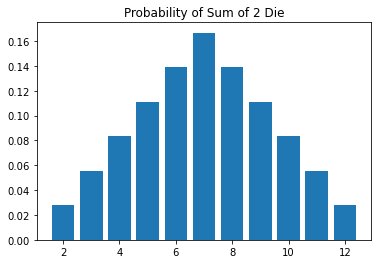

In [3]:
x_coord = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
plt.bar(x_coord, conv)
plt.title('Probability of Sum of 2 Die')
plt.show()

3) Calculate the mean and the variance of the distribution in problem 2. Hint: this is surprisingly tricky, make sure your result makes sense.

Expectation value: $\sum_i x_i*P(x_i) $

In [4]:
mean = 0
for i in range(0,11):
    mean += conv[i]*x_coord[i]
    
print('Mean = ', mean)

Mean =  7.0


In [5]:
variance = 0
for i in range(0,11):
    variance += ((x_coord[i] - mean)**2)*conv[i]
print('Variance = ', variance)

Variance =  5.833333333333334


4) Repeat 2, and graph the average of 10 dice. Is this is a Gaussian distribution? Explain in depth.

In [6]:
for i in range (0, 8):
    conv = np.convolve(conv, dice_1)

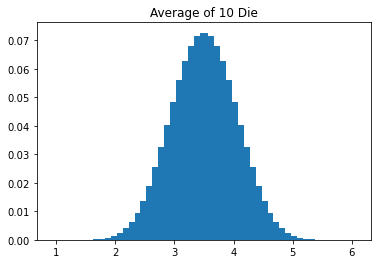

In [7]:
vals_10_die = []
for i in range(10, 61):
    vals_10_die.append(i/10)

plt.bar(vals_10_die, conv, width = .15)
plt.title('Average of 10 Die')
plt.show()

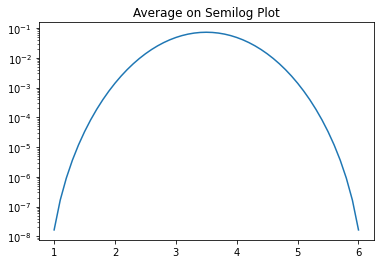

This looks close to a parabola, so convolving 10 times is approaching a Gaussian distribution according to central limit the


In [8]:
plt.semilogy(vals_10_die, conv)
plt.title('Average on Semilog Plot')
plt.show()
print('This looks close to a parabola, so convolving 10 times is approaching a Gaussian distribution according to central limit the')

5) Show that the sum and average of an initially Gaussian distribution is also a Guassian (can be analytic or numerical). How does the standard deviation of the resulting sum or average Guassian change? This is a hugely important result. Explore what this means for integrating a signal over time.

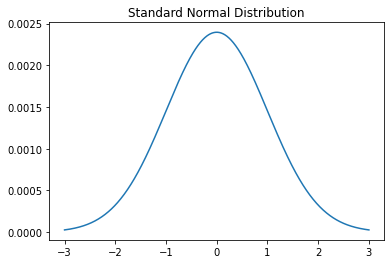

In [47]:
x = np.linspace(-3, 3, 1000)
gaus = stats.norm.pdf(x) *(x[1]-x[0])


plt.plot(x, gaus)
plt.title('Standard Normal Distribution')
plt.show()


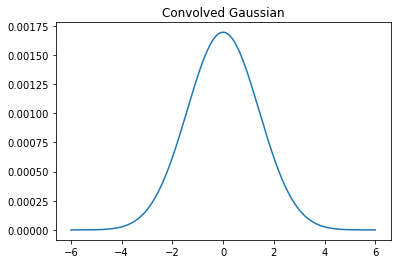

In [52]:
x_vals = np.linspace(-6, 6, 1999)
gaus_conv = np.convolve(gaus,gaus) 

plt.plot(x_vals, gaus_conv)
plt.title('Convolved Gaussian')

plt.show()

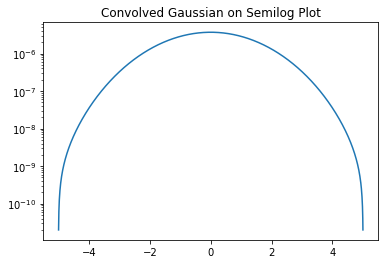

In [13]:
plt.semilogy(x_vals, gaus_conv)
plt.title('Convolved Gaussian on Semilog Plot')
plt.show()

Semilog plot of the convolved Gaussian is close to a parabola, meaning that it is Gaussian, or near Gaussian.

Standard deviation = $ \sqrt\sigma $, where $\sigma = Variance$

For two normal distributions expected standard variance is $\sigma^2 = \sigma_1^2 + \sigma_2^2$, meaning we expect the standard deviation to be $\sigma = \sqrt2$ because $\sigma_1 = 1$ and $\sigma_2 = 2$

In [59]:
variance = 0
for i in range(0,len(x_vals)):
    variance += (x_vals[i]**2)*gaus_conv[i]
std = np.sqrt(variance)
print('Standard Deviation = ', std,)

Standard Deviation =  1.3916555020672021


This is very close to the expected result of 1.41, it may be slightly off becuause we have to approximate our normal distributions with discrete functions in python. 

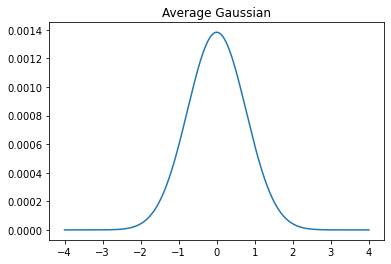

In [65]:
# average of 2 convolutions
x_vals_2 = np.linspace(-12, 12, 2998)/3
gaus_conv_2 = np.convolve(gaus_conv, gaus) 

plt.plot(x_vals_2, gaus_conv_2)
plt.title('Average Gaussian')
plt.show()

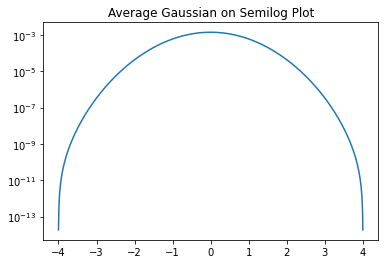

In [67]:
plt.semilogy(x_vals_2, gaus_conv_2)
plt.title('Average Gaussian on Semilog Plot')
plt.show()

In [68]:
variance = 0
for i in range(0,len(x_vals_2)):
    variance += (x_vals_2[i]**2)*gaus_conv_2[i]
std = np.sqrt(variance)
print('Standard Deviation = ', std,)

Standard Deviation =  0.75650810353187


The average Gaussian also appears to be parabolic on a semilog plot. Both the sum and average of the Gaussian distributions are still Gaussian.

As we can see from summing and averaging gaussian distributions, the standard deviation increases for summing and decreases for averaging. If we are taking data over different periods of time we would average the distribtions, resulting in a distribution with smaller standard deviations/variances, which means the data is more distributed around the mean. 